# Generelle Auswertung der Daten
Diese Datei erhält generelle Auswertungen zu den gesammmelten Daten.
1. Berechnung aller getrackten Personen
2. Mittelwert der Personen zu den gefilmten Zeitpunkten (auf 30 Minuten gerundet)
3. Histogramme
    - Fahgastwechselzeiten
    - Getrackte Personen

## Bibliotheken

In [54]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import datetime as datet

## Stildefiniton für Plots

In [55]:
#Definierter Plotstyle für die Bachelorarbeit
#Muss zu den anderen Bibliotheken hinzugefügt werden
#Datei in Dateien eingefügt
plt.style.use("ba")

## Helferfunktionen

In [56]:
def load_data(path):
    data = pd.DataFrame(pd.read_csv(path+file_suffix, sep=";"))
    return data

# Helferfunktion zum Runden der gefilmten Zeiten auf 30 Minuten
def find_30(time_array):
    hours = int(time_array[0])
    mints = int(time_array[1])
    if 15 <= mints <= 45:
        mints = 30
    elif mints < 15:
        mints = 0
    elif mints > 45:
        mints = 0
        hours = int(hours) + 1
    return datet.time(hours, mints)

def round_to_30(time_data):
    result = time_data.apply(lambda x: x.split(':')).apply(lambda x : find_30(x))
    return result


def plot_hist(df, ymax, xlabel, ylabel, filename, unit, std_unit="", prez=1, bins=20):
    mean = df.mean()
    std = df.std()
    median = df.median()
    maximum = df.max()
    minimum = df.min()
    
    plt.hist(df, bins=bins)
    
    plt.vlines(mean, ymin=0, ymax=ymax, label="Mittelwert: \n{0:.{1}f} {2}".format(mean, prez, unit))
    
    plt.vlines(mean-std, linestyle='--', ymin=0, ymax=ymax)
    plt.vlines(mean+std, linestyle='--', ymin=0, ymax=ymax)
    
    plt.arrow(mean, ymax+0.01, std, 0, width=0.01, length_includes_head=True, head_width=0.15, head_length=0.4, color='k')
    plt.arrow(mean+std, ymax+0.01, -std, 0, width=0.01, length_includes_head=True, head_width=0.15, head_length=0.4, color='k')
    
    plt.text(mean-(std*0.5), ymax+.1, "Std.: {0:.{1}f} {2}".format(std, prez, std_unit), fontsize=26)
    
    plt.arrow(mean, ymax+.01, -std, 0, width=.01, length_includes_head=True, head_width=0.15, head_length=0.4, color='k')
    plt.arrow(mean-std, ymax+.01, std, 0, width=.01, length_includes_head=True, head_width=0.15, head_length=0.4, color='k')
    
    plt.vlines(median, ymin=0, ymax=ymax, color='r', label="Median: \n{0:.{1}f} {2}".format(median, prez, unit))
    
    plt.ylim(0, ymax+.7)
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig("..\Text\pictures\\"+filename+".png")

## Laden der Daten

In [57]:
path = "Tabels/Times"
file_suffix = ".csv"

In [58]:
data = load_data(path)
#data

# Berechnung aller getrackten Personen

In [59]:
persons = sum(data['core alight']+data['later alight'])+sum(data['core boarding']+data['later boarding'])+sum(data['spacemaker'])
print("Alle Personen {}".format(persons))

Alle Personen 1173


## Datenvorverarbeitung
Mittelwert Personen gefilmten Zeitpunkten gerundet auf 30 Minuten

In [60]:
data = load_data_and_datetime(path)

data['arrival time'] = round_to_30(data['arrival time'])

types = ['all alight', 'all boarding', 'spacemaker']
times_dic = {'all alight': {}, 'all boarding': {}, 'spacemaker': {}}

for row in data.iterrows():
    row = row[1]
    time = row['arrival time']
    for typ in types:
        if time not in times_dic[typ].keys():
            if 'all' in typ:
                ptype = typ.split(' ')[1]
                times_dic[typ][time] = [row['core '+ptype]+row['later '+ptype]]
            else:
                times_dic[typ][time] = [row[typ]]
        else:
            if 'all' in typ:
                ptype = typ.split(' ')[1]
                times_dic[typ][time].append(row['core '+ptype]+row['later '+ptype])
            else:
                times_dic[typ][time].append(row[typ])
for t in times_dic:
    for typ in times_dic[t]:
        times_dic[t][typ] = np.array(times_dic[t][typ]).mean()

df = pd.DataFrame(times_dic)

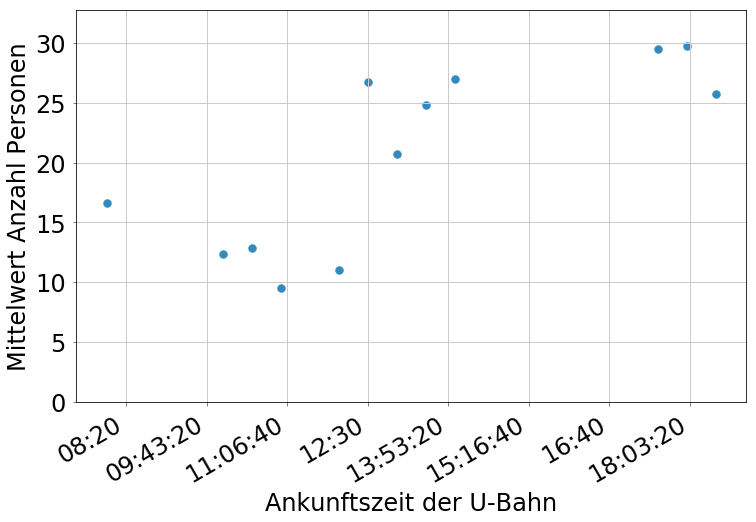

In [61]:
plt.scatter(df.index.values, df['all alight']+df['all boarding']+df['spacemaker'])

plt.xlabel('Ankunftszeit der U-Bahn')
plt.ylabel('Mittelwert Anzahl Personen')

plt.ylim(0, max(df['all alight']+df['all boarding']+df['spacemaker'])+3)
plt.gcf().autofmt_xdate()
plt.savefig('..\Text\pictures\\observation\\recording\peopleOverTime.png')
plt.show()

# Histogramme
1. Histogramm der Fahrgastwechselzeit
2. Histogramm der Anzahl der getrackten Personen

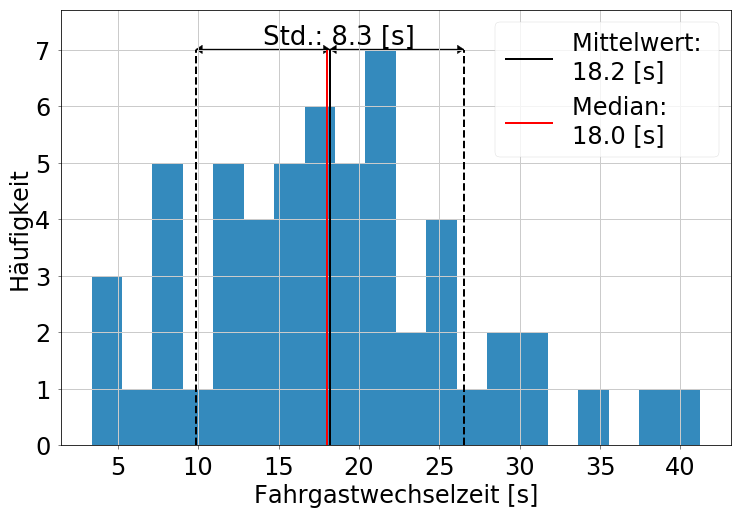

In [62]:
plot_hist(data['time'], 7, "Fahrgastwechselzeit [s]", "Häufigkeit", "data_evaluation\\transferTime\hist_transfer_times", "[s]", "[s]")

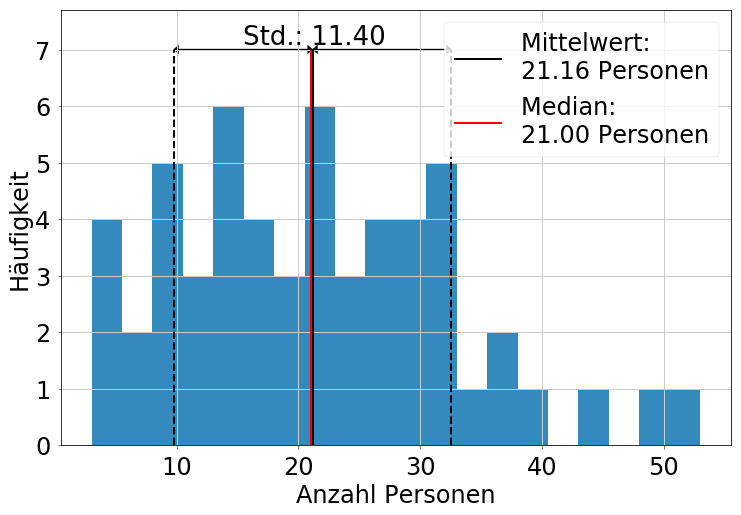

In [63]:
persons = data['core alight']+data['later alight']+data['core boarding']+data['later boarding']+2*data['spacemaker']
plot_hist(persons, 7, "Anzahl Personen", "Häufigkeit", "data_evaluation\\data_description\\hist_persons", "Personen", prez=2)

## Kuchendiagramm der Anteile der Prozesstypen

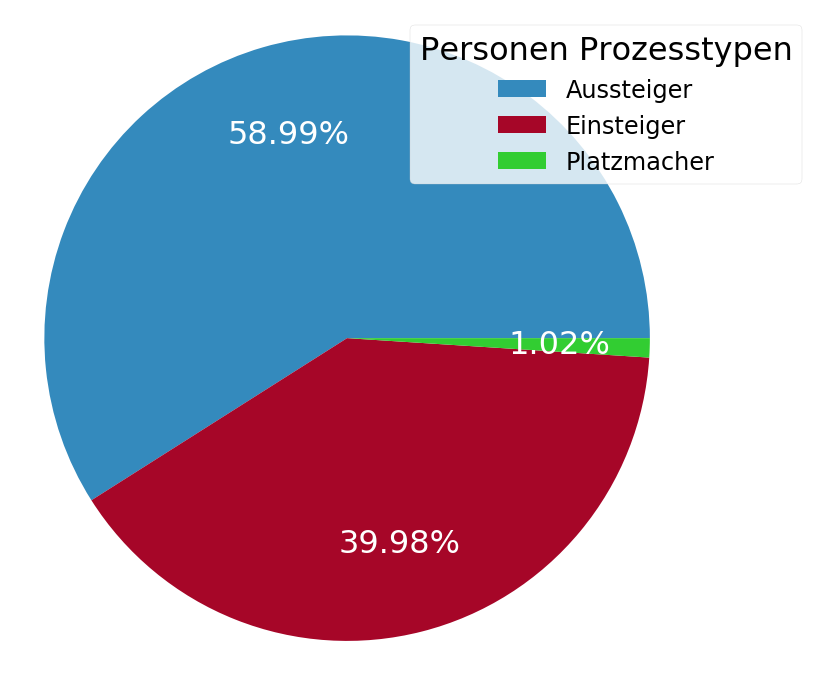

In [64]:
plt.figure(figsize=(12, 12))

labels = 'Aussteiger', 'Einsteiger', 'Platzmacher'
sums = [sum(data['core alight']+data['later alight']), sum(data['core boarding']+data['later boarding']), sum(data['spacemaker'])]

plt.pie(sums, labels=labels, autopct='%1.2f%%', pctdistance=0.7, startangle=0, textprops=dict(color='w'))
plt.legend(title='Personen Prozesstypen', bbox_to_anchor=(0.7, 0, 0.5, 1))
plt.axis('equal')
plt.savefig('..\Text\pictures\\data_evaluation\\data_description\\process_types.png', bbox_inches='tight')